# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-Compiling-Ebola-Data"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Compiling Ebola Data</a></div>
 <div class="lev1"><a href="#Task-2.-RNA-Sequences"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>RNA Sequences</a></div>
 <div class="lev1"><a href="#Task-3.-Class-War-in-Titanic"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Class War in Titanic</a></div></p>

In [ ]:
DATA_FOLDER = '' # Use the data folder provided in Tutorial 02 - Intro to Pandas.

## Task 1. Compiling Ebola Data

The `DATA_FOLDER/ebola` folder contains summarized reports of Ebola cases from three countries (Guinea, Liberia and Sierra Leone) during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

Use pandas to import these data files into a single `Dataframe`.
Using this `DataFrame`, calculate for *each country*, the *daily average per month* of *new cases* and *deaths*.
Make sure you handle all the different expressions for *new cases* and *deaths* that are used in the reports.

For task 1 we first load all the data from each country in a DataFrame. At the same time we will cut out 
all columns we do not need in the task and then cut out all rows we do not need. 
After that we merge these 3 DataFrames to one big DataFrame as asked in the task. 
Then we create a DataFrame to present our results from the upcoming operations. 
To automate the process of calculating the averages we than run a procedure, which sums the new deaths and cases and divides them by the number of days per month. Since the data is not always correct we then run some adjustments for data which has a different type or where data is missing. 

In [1]:
import glob
import pandas as pd
import numpy as np
import calendar
from datetime import datetime
pd.options.mode.chained_assignment = None 

# Assumptions for the analysis 
# We assume that the data files are complete and that data given is cumulative over the intermediate days

# Load Guinea data

path =r'Data/ebola/guinea_data' 
allFiles = glob.glob(path + "/*.csv")
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_, header=0)
    list_.append(df)
frame_guinea = pd.concat(list_)

# Exclude all unnecessary columns, since we are only interested in totals 
frame_guinea = frame_guinea[['Description','Date','Totals']]

# We first check for unique labels in the 'Description'-column 
frame_guinea.Description.unique()

# We are only interested in the new cases and new deaths. Therefore we cut out all other rows, which are not
# in the command below. We chose which rows to keep by looking at the data file in excel
# In this case we need two description for new deaths, because the first file has a different description than the other ones
frame_guinea = frame_guinea.loc[frame_guinea['Description'] .isin(['Total new cases registered so far', 'New deaths registered', 'New deaths registered today'])]

# Create a new column named country to seperate the data from different countries 
frame_guinea['Country'] = 'Guinea'

# Load Liberia data 

path =r'Data/ebola/liberia_data' 
allFiles = glob.glob(path + "/*.csv")
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_, header=0)
    list_.append(df)
frame_liberia = pd.concat(list_, ignore_index=True)

# Exclude all unnecessary columns
frame_liberia = frame_liberia[['Variable','Date','National']]

# Rename the columns
frame_liberia.columns = ['Description','Date','Totals']

# Checking for unique labels in the 'Description'-column 
frame_liberia.Description.unique()

# We are only interested in the new cases and new deaths. Therefore we cut out all other rows, which are not
# in the command below. We chose which rows to keep by looking at the data file in excel
frame_liberia = frame_liberia.loc[frame_liberia['Description'].isin(['Newly reported deaths', 'Total confirmed cases', 'New case/s (confirmed)'])]

# Create a new column named country to seperate the data from different countries 
frame_liberia['Country'] = 'Liberia'

# Load Sierra Leone data 

path =r'Data/ebola/sl_data' 
allFiles = glob.glob(path + "/*.csv")
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_, header=0)
    list_.append(df)
frame_sierraleone = pd.concat(list_)

# Exclude all unnecessary columns
frame_sierraleone = frame_sierraleone[['variable','date','National']]

# Rename the columns
frame_sierraleone.columns = ['Description','Date','Totals']

# Checking for unique labels in the 'Description'-column 
frame_sierraleone.Description.unique()

# We are only interested in the new cases and new deaths. Therefore we cut out all other rows, which are not
# in the command below. We chose which rows to keep by looking at the data file in excel
frame_sierraleone = frame_sierraleone.loc[frame_sierraleone['Description'].isin(['new_confirmed','death_confirmed'])]

# Create a new column named country to seperate the data from different countries 
frame_sierraleone['Country'] = 'Sierraleone'

# Create one single Dataframe

list_ = []
list_.append(frame_guinea)
list_.append(frame_liberia)
list_.append(frame_sierraleone)

frame_total = pd.concat(list_, ignore_index=True)

# Convert the Date column into datetime type

frame_total.Date = pd.to_datetime(frame_total.Date)

# Create average deaths and average new cases 
# We did the same for deaths
# We put the results of that in a DataFrame called info 


info = pd.DataFrame(columns=('Country', 'Month', 'Av. deaths', 'Av. new cases'))

# for-loop going through every month.
# We fill the data frame with the country first, then the month, then deaths and then the new cases
# For deaths we just select those rows where the description describes the new deaths and the month of the loop
# After that we sum over all the rows left and divide it by the days of the selected month
# We do the same for the new cases
# The descriptions used differ for every country and new cases or deaths

# We need the if-loops for the months in which we have no data. We declare these cells as unknown 

for i in range(6,13):
    if 7 < i < 11:
        info.loc[(i-5)*3-2] = ['Guinea', i, pd.to_numeric(frame_total[(frame_total.Description.isin(['New deaths registered', 'New deaths registered today'])) & (frame_total['Date'].dt.month == i)].Totals, errors='coerce').sum()/calendar.monthrange(2014,i)[1], 
        pd.to_numeric(frame_total[(frame_total.Description.isin(['Total new cases registered so far'])) & (frame_total['Date'].dt.month == i)].Totals, errors='coerce').sum()/calendar.monthrange(2014,i)[1]]
    else:
        info.loc[(i-5)*3-2] = ['Guinea', i, 'unknown', 'unknown']
        
    info.loc[(i-5)*3-1] = ['Liberia', i, pd.to_numeric(frame_total[(frame_total.Description.isin(['Newly reported deaths'])) & (frame_total['Date'].dt.month == i)].Totals, errors='coerce').sum()/calendar.monthrange(2014,i)[1], 
    pd.to_numeric(frame_total[(frame_total.Description.isin(['New case/s (confirmed)'])) & (frame_total['Date'].dt.month == i)].Totals, errors='coerce').sum()/calendar.monthrange(2014,i)[1]]
    
    if 7 < i:
        info.loc[(i-5)*3] = ['Sierra Leone', i, 'unkown', 
        pd.to_numeric(frame_total[(frame_total.Description.isin(['new_confirmed'])) & (frame_total['Date'].dt.month == i)].Totals, errors='coerce').sum()/calendar.monthrange(2014,i)[1]]
    else:
        info.loc[(i-5)*3] = ['Sierra Leone', i, 'unknown', 'unknown']

        
        
# Adjustments 
# Adjusting the data. The data of Sierra Leone is different from the others, because we do not have data for new deaths per day. 
# Therefore we take the total deaths at the end of the month and subtract the numbers of deaths from the beginning of the month.

info.loc[9, 'Av. deaths'] = (pd.to_numeric(frame_total[(frame_total.Description.isin(['death_confirmed'])) & (frame_total['Date'] == datetime(2014, 8, 31))].Totals, errors='coerce').values[0] - pd.to_numeric(frame_total[(frame_total.Description.isin(['death_confirmed'])) & (frame_total['Date'] == datetime(2014, 8, 12))].Totals, errors='coerce').values[0])/calendar.monthrange(2014,8)[1]
info.loc[12, 'Av. deaths'] = (pd.to_numeric(frame_total[(frame_total.Description.isin(['death_confirmed'])) & (frame_total['Date'] == datetime(2014, 9, 30))].Totals, errors='coerce').values[0] - pd.to_numeric(frame_total[(frame_total.Description.isin(['death_confirmed'])) & (frame_total['Date'] == datetime(2014, 8, 31))].Totals, errors='coerce').values[0])/calendar.monthrange(2014,9)[1]
info.loc[15, 'Av. deaths'] = (pd.to_numeric(frame_total[(frame_total.Description.isin(['death_confirmed'])) & (frame_total['Date'] == datetime(2014, 10, 31))].Totals, errors='coerce').values[0] - pd.to_numeric(frame_total[(frame_total.Description.isin(['death_confirmed'])) & (frame_total['Date'] == datetime(2014, 9, 30))].Totals, errors='coerce').values[0])/calendar.monthrange(2014,10)[1]
info.loc[18, 'Av. deaths'] = (pd.to_numeric(frame_total[(frame_total.Description.isin(['death_confirmed'])) & (frame_total['Date'] == datetime(2014, 11, 29))].Totals, errors='coerce').values[0] - pd.to_numeric(frame_total[(frame_total.Description.isin(['death_confirmed'])) & (frame_total['Date'] == datetime(2014, 10, 31))].Totals, errors='coerce').values[0])/calendar.monthrange(2014,11)[1]
info.loc[21, 'Av. deaths'] = (pd.to_numeric(frame_total[(frame_total.Description.isin(['death_confirmed'])) & (frame_total['Date'] == datetime(2014, 12, 6))].Totals, errors='coerce').values[0] - pd.to_numeric(frame_total[(frame_total.Description.isin(['death_confirmed'])) & (frame_total['Date'] == datetime(2014, 11, 29))].Totals, errors='coerce').values[0])/calendar.monthrange(2014,12)[1]

# In the Liberia data for december for new cases is a problem. It seems that they switched the total cases to the new cases
# in the middle of the month. 
# Therefore we have adjust the data for this month as well manually

info.loc[20, 'Av. new cases'] = (pd.to_numeric(frame_total[(frame_total.Description.isin(['New case/s (confirmed)'])) & (frame_total['Date'] == datetime(2014, 12, 9))].Totals, errors='coerce').values[0] - pd.to_numeric(frame_total[(frame_total.Description.isin(['Total confirmed cases'])) & (frame_total['Date'] == datetime(2014, 11, 30))].Totals, errors='coerce').values[0])/calendar.monthrange(2014,12)[1]

# Since we considered only confirmed cases and deaths in our statistic and there is explicit information about total or new 
# confirmed deaths for the Liberia data in december we set the average to unknown

info.loc[20, 'Av. deaths'] = 'unknown'

# We need one more adjustment for the first months and last months of the data. We divided the number of deaths each time 
# by the number of days of each month. But we just take the dat in december for Sierra Leone for the first 6 days
# so we should just divid by 6. 
# Therefore we adjust the those numbers by a factor to divid by the actual days that we have the data from 

# First months 
info.loc[7, ['Av. deaths', 'Av. new cases']] = info.loc[7, ['Av. deaths', 'Av. new cases']]*31/27
info.loc[2, ['Av. deaths', 'Av. new cases']] = info.loc[2, ['Av. deaths', 'Av. new cases']]*31/13
info.loc[9, ['Av. deaths', 'Av. new cases']] = info.loc[9, ['Av. deaths', 'Av. new cases']]*31/19

# Last months
info.loc[13, ['Av. deaths', 'Av. new cases']] = info.loc[13, ['Av. deaths', 'Av. new cases']]*31/1
info.loc[20, 'Av. new cases'] = info.loc[20, 'Av. new cases']*31/9
info.loc[21, ['Av. deaths', 'Av. new cases']] = info.loc[21, ['Av. deaths', 'Av. new cases']]*31/6

# Final DataFrame

info


,Country,Month,Av. deaths,Av. new cases
1,Guinea,6,unknown,unknown
2,Liberia,6,1.07692,1.15385
3,Sierra Leone,6,unknown,unknown
4,Guinea,7,unknown,unknown
5,Liberia,7,1.51613,0.645161
6,Sierra Leone,7,unknown,unknown
7,Guinea,8,0.609319,4.62366
8,Liberia,8,6.74194,1.58065
9,Sierra Leone,8,6.26486,18.8964
10,Guinea,9,1.9,10.4667


## Task 2. RNA Sequences

In the `DATA_FOLDER/microbiome` subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10<sup>th</sup> file that describes the content of each. 

Use pandas to import the first 9 spreadsheets into a single `DataFrame`.
Then, add the metadata information from the 10<sup>th</sup> spreadsheet as columns in the combined `DataFrame`.
Make sure that the final `DataFrame` has a unique index and all the `NaN` values have been replaced by the tag `unknown`.

Overview of the analysis carried out
The metadata information is loaded into a data frame called metadata
The other 9 spreadsheets are add to a list called all_files
We read the files from all_files into individual dataframes
and add info on filename, group and sample from the metadata to each dataframe during the loop
Then the dataframes are concatinated into one combined dataframe called microbiome
Note that we made sure that indexing was continuous and hence should be unique
We confirm uniqueness of our index
NaN were only observed in the sample column, we replace NaN by unknown and check that no cases were overlooked
We create an index using combinations of the columns for species, group and sample to have a 'meaningful' unique index

In [2]:
import glob
import os
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None 

path = r'Data/microbiome' 
#Load metadata file into a data frame
metadata = pd.read_excel("Data/microbiome/metadata.xls")

#Load all files (includes metadata file again!)
all_files = glob.glob(os.path.join(path, "*.xls")) 
#Drop first entry from list as list starts with metadata.xls 
del all_files[0]


microbiome = pd.DataFrame()
dflist_ = [] #list for data frames
N=0 #counter to identify row in metadata 
for file_ in all_files:
    frame = pd.read_excel(file_, header=None)       #Reading current file into the df frame
    filename = os.path.basename(file_) #extracting file name
    filename_short = filename[:-4]     #dropping file extension
    frame['Filename'] = filename_short #Adding original filename in a new column, as a check
    frame['Group'] = metadata.loc[N,"GROUP"]
    frame['Sample'] = metadata.loc[N,"SAMPLE"]
    N= N+1 
    dflist_.append(frame)
     
microbiome = pd.concat(dflist_, ignore_index=True)   #using  ignore_index=True option to provide unique index for each individual entry
#Checking uniqueness of current index
microbiome.index.is_unique
#Returned True
#Otherwise could consider merging several columns into an index as done in tutorial baseball example

#Replacing NAN in SAMPLE for MID1 with "unknown"
microbiome['Sample'] = microbiome['Sample'].replace(np.nan, 'unknown', regex=True)
#Checking that all NaN where captured
microbiome.isnull().values.any()
#Returned False

#Relabel first 2 columns
microbiome.columns = ['Species', 'Quantity', 'Filename', 'Group', 'Sample']
microbiome.Species

#Following FAQ 19 we construct meaningful index by combining 'Species', 'Group' and 'Sample'
new_id = microbiome.Species + microbiome.Group + microbiome.Sample
microbiome_newind = microbiome.copy()
microbiome_newind.index = new_id
microbiome_newind.head()
#Checking uniqueness of current index
microbiome_newind.index.is_unique
#Returned True
microbiome_newind

,Species,Quantity,Filename,Group,Sample
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae IgnisphaeraEXTRACTION CONTROLunknown","Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",7,MID6,EXTRACTION CONTROL,unknown
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae SulfophobococcusEXTRACTION CONTROLunknown","Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",1,MID6,EXTRACTION CONTROL,unknown
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Pyrodictiaceae PyrodictiumEXTRACTION CONTROLunknown","Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",1,MID6,EXTRACTION CONTROL,unknown
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Pyrodictiaceae PyrolobusEXTRACTION CONTROLunknown","Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",2,MID6,EXTRACTION CONTROL,unknown
"Archaea ""Crenarchaeota"" Thermoprotei Sulfolobales Sulfolobaceae StygiolobusEXTRACTION CONTROLunknown","Archaea ""Crenarchaeota"" Thermoprotei Sulfoloba...",5,MID6,EXTRACTION CONTROL,unknown
"Archaea ""Crenarchaeota"" Thermoprotei Sulfolobales Sulfolobaceae SulfurisphaeraEXTRACTION CONTROLunknown","Archaea ""Crenarchaeota"" Thermoprotei Sulfoloba...",4,MID6,EXTRACTION CONTROL,unknown
"Archaea ""Crenarchaeota"" Thermoprotei Thermoproteales Thermofilaceae ThermofilumEXTRACTION CONTROLunknown","Archaea ""Crenarchaeota"" Thermoprotei Thermopro...",4,MID6,EXTRACTION CONTROL,unknown
"Archaea ""Crenarchaeota"" Thermoprotei Thermoproteales Thermoproteaceae CaldivirgaEXTRACTION CONTROLunknown","Archaea ""Crenarchaeota"" Thermoprotei Thermopro...",1,MID6,EXTRACTION CONTROL,unknown
"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Methanocellales Methanocellaceae MethanocellaEXTRACTION CONTROLunknown","Archaea ""Euryarchaeota"" ""Methanomicrobia"" Meth...",12,MID6,EXTRACTION CONTROL,unknown
"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Methanomicrobiales Methanomicrobiaceae MethanomicrobiumEXTRACTION CONTROLunknown","Archaea ""Euryarchaeota"" ""Methanomicrobia"" Meth...",2,MID6,EXTRACTION CONTROL,unknown


## Task 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

Below we list the attributes in titanic.xls and their type and range:

#pclass: Integer with 3 options: 1, 2, 3;
#survived: Integer with 2 options: 1 (survived), 0 (died);
#name: object (string);
#sex: Object with 2 options: F, M;
#age: float 64 range=0 to 80;
#sibsp: Integer with multiple options: [0, 1, 2, 3, 4, 5, 8];
#parch: Integer with multiple options: [0, 2, 1, 4, 3, 5, 6, 9];
#ticket: object;
#fare: float64 range 0 to 263;
#cabin: object combined of 1 letter and a number (finite range);
#embarked: object with 3 options: C(herbourg), Q(ueenstown), S(outhampton);
#boat: object (as label is string);
#body: float64 range=1 to 328;
#homedest: object;

#We will treat the following variables as categorical data: pclass, survived, sex, embarked. 
#We will not treat cabins and boats as categorical data for the following reasons: 
#While cabins and boats form two finite sets with clear labels and both appear to be treated as categorical variables on the webpage
#there are examples with double entries for cabins (e.g. 'C22 C26'). Thus there is no unique single cabin we can assign in this case.
#Note one could consider the cabin class (A, B, C, D or E) as a categorical variable.
#For the attribute boats people we have the same issue, some people have more then one boat listed.
#While people who died are labelled as NaN, which is not a boat, one could consider this simply as a separate category.


In [3]:
# from IPython.core.display import HTML
# HTML(DataHW1/titanic.html')
import glob
import os
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None 

path = r'Data' 
#Load titanic xls file into a data frame
titanic = pd.read_excel("Data/titanic.xls")

# Below we list the attributes in titanic.xls and their type and range:
#
# pclass: Integer with 3 options: 1, 2, 3;
# survived: Integer with 2 options: 1 (survived), 0 (died);
# name: object (string);
# sex: Object with 2 options: F, M;
# age: float 64 range=0 to 80;
# sibsp: Integer with multiple options: [0, 1, 2, 3, 4, 5, 8];
# parch: Integer with multiple options: [0, 2, 1, 4, 3, 5, 6, 9];
# ticket: object;
# fare: float64 range 0 to 263;
# cabin: object combined of 1 letter and a number (finite range);
# embarked: object with 3 options: C(herbourg), Q(ueenstown), S(outhampton);
# boat: object (as label is string);
# body: float64 range=1 to 328;
# homedest: object;

# We will treat the following variables as categorical data: pclass, survived, sex, embarked. 
# We will not treat cabins and boats as categorical data for the following reasons: 
# While cabins and boats form two finite sets with clear labels and both appear to be treated as categorical variables on the webpage
# there are examples with double entries for cabins (e.g. 'C22 C26'). Thus there is no unique single cabin we can assign in this case.
# Note one could consider the cabin class (A, B, C, D or E) as a categorical variable.
# For the attribute boats people we have the same issue, some people have more then one boat listed.
# While people who died are labelled as NaN, which is not a boat, one could consider this simply as a separate category.

pd.Categorical(titanic.pclass)
pd.Categorical(titanic.survived)
pd.Categorical(titanic.sex)
pd.Categorical(titanic.embarked)

titanic


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


We use bar plot to illustrate the diffrent amounts in travel class, embarkation port and sex. The main reason that we don't use the hist function is that our variables are of type object. The hist function can only take integers and therefore we would have to transform the data which is unnecessary when we can use bar plot. We also think that bar plot illustrate the data more nicely and therefor we chosed to use it for the class aswell, where we could have used hist since the diffrent classes are represented by integers.

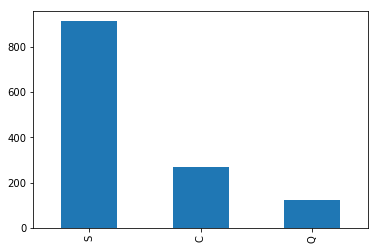

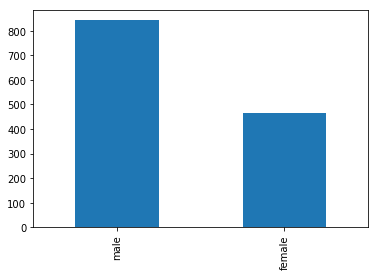

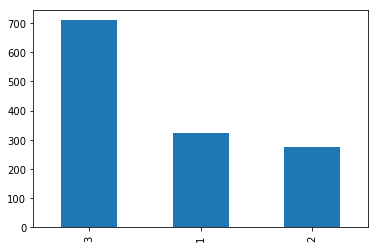

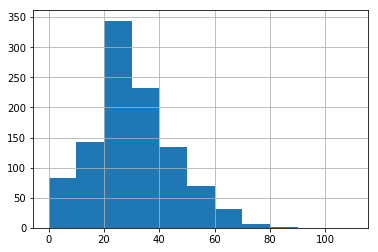

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Task 2: Plot histograms for the travel class, embarkation port, sex and age attributes. For the latter one,
#use discrete decade intervals.

titanic = pd.read_excel("Data/titanic.xls")
#We count the number of persons that did go on titanic from each port. 
#We do this by using the value_counts() in the embarked colum. We then plot the result in a bar plot.
titanic.embarked.value_counts().plot.bar()
plt.show()
#Same method as above but use the sex column instead.
titanic.sex.value_counts().plot.bar()
plt.show()
#Same method as above but use the pclass column instead.
titanic.pclass.value_counts().plot.bar()
plt.show()
# We creat a age interval as an array and then we us this as the bins intervall in the hist function which
#plot a histogram. By doing this we get a disrete decade interval for the age with an lenght of 10 years.
age_interval = np.array([0,10,20,30,40,50,60,70,80,90,100,110])
titanic.age.hist(bins=age_interval)
plt.show()

In task 3 we calculate the proportion of passengers by cabin floor and present the results in a pie chart. We assume that floor T does not exsist since it only appear once. All NaN values are replace by Unknown so that we easier can show them in the pie plot where they are named 'U'. We get the floor letter from each passenger by looping through each passenger and read the first letter of the cabin number which represent the floor. For passengers with two room numbers we only take the floor of the first floor since they, in the most cases, got the rooms on the same floor. From the created series with all the floors for each passenger we calculated how many times each floor appear with the count function. We save the data in a datafram and use dataframe.plot.pie() to plot the pie chart. We made the chart big so that all pies are visible.

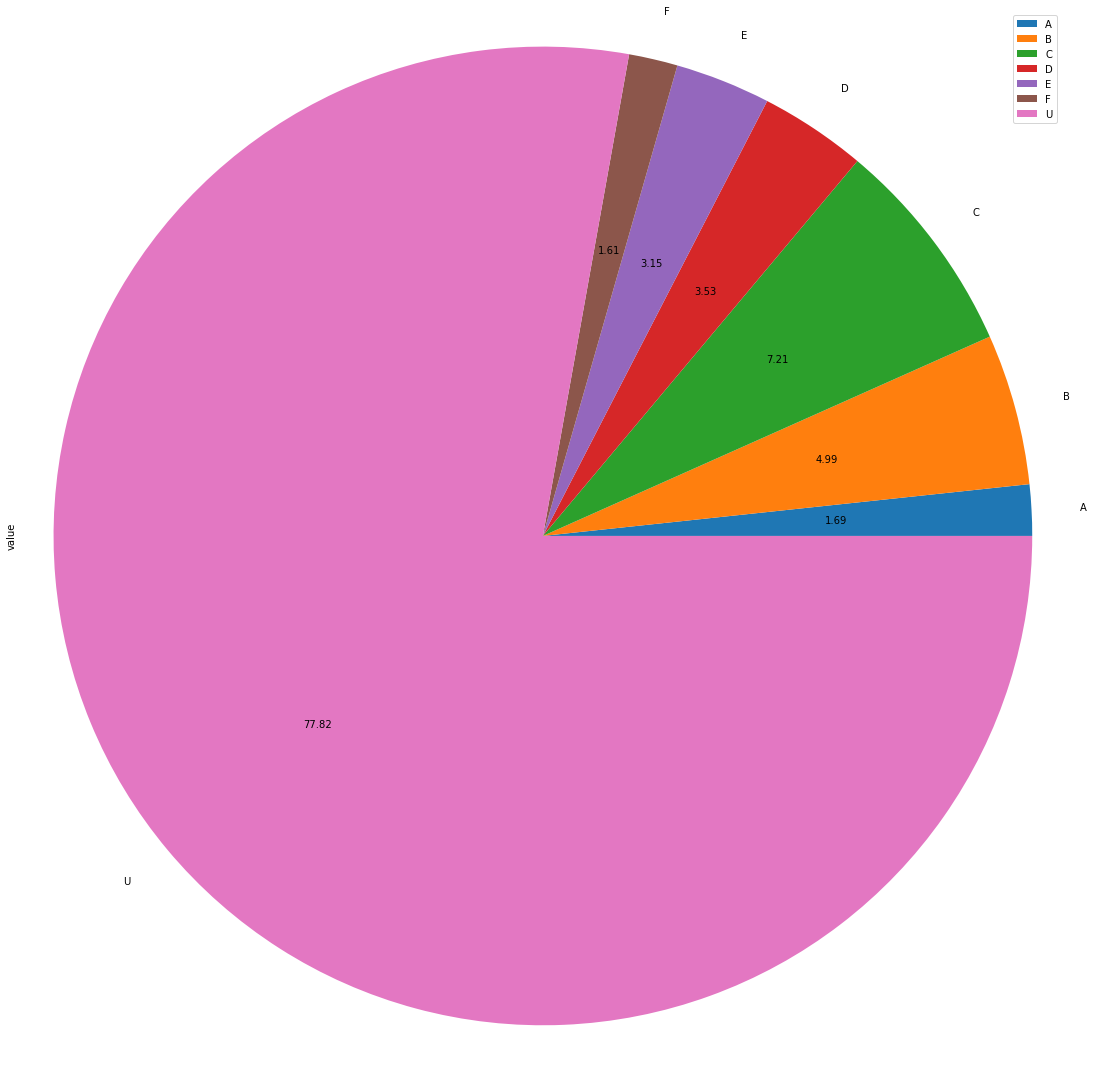

In [15]:
#Task3 Calculate the proportion of passengers by cabin floor. Present your results in a pie chart.
# From reading the data 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

titanic = pd.read_excel("Data/titanic.xls")
#Replace all NaN values with "Unknown". 
mb = titanic.replace(np.nan, 'Unknown', regex=True)
#Create a series called floor and loop through the diffrent rows in the cabin column and
#extract the first letter in the column which represent the floor and then add it to the floor series.
floor = []
for i in range(len(mb)):
    floor.append(mb.cabin[i][0])
#Use count function to count how many times a floor appear in the floor series. Store this data in a dataframe called
#data_floor and a column with the name of the floor for the respective count value.
data_floor = pd.DataFrame({'value':[floor.count('A'), floor.count('B'), floor.count('C'), floor.count('D'), floor.count('E'), floor.count('F'), floor.count('U')],
                    'Floor':['A', 'B', 'C', 'D', 'E', 'F', 'U']})   
#Plot the data in a pie plot where the percentege is displayed
data_floor.value.plot.pie(labels=data_floor.Floor,autopct='%0.2f', fontsize=10, figsize=(15, 15))
plt.legend(data_floor.Floor, loc="best",)
plt.axis('equal')
plt.tight_layout()
plt.show()

In task 4 we calculate, for each travel class,  the proportion of the passengers that survived. We use loc function to only look at one class at a time and the we use value_count() to count how many survived/died and plot this value in a pie chart. 

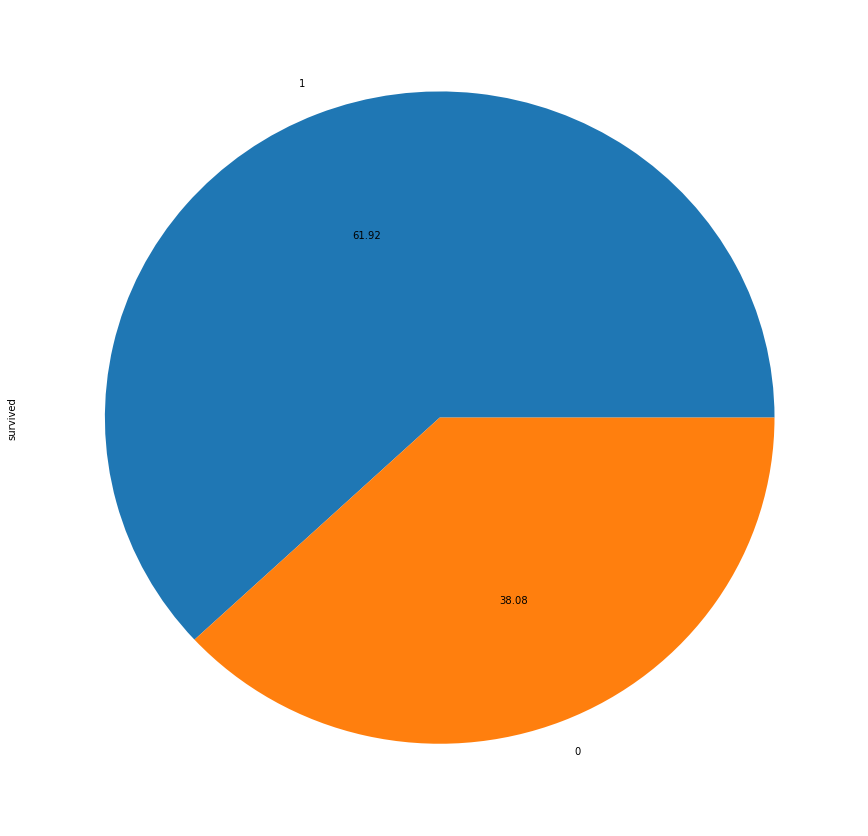

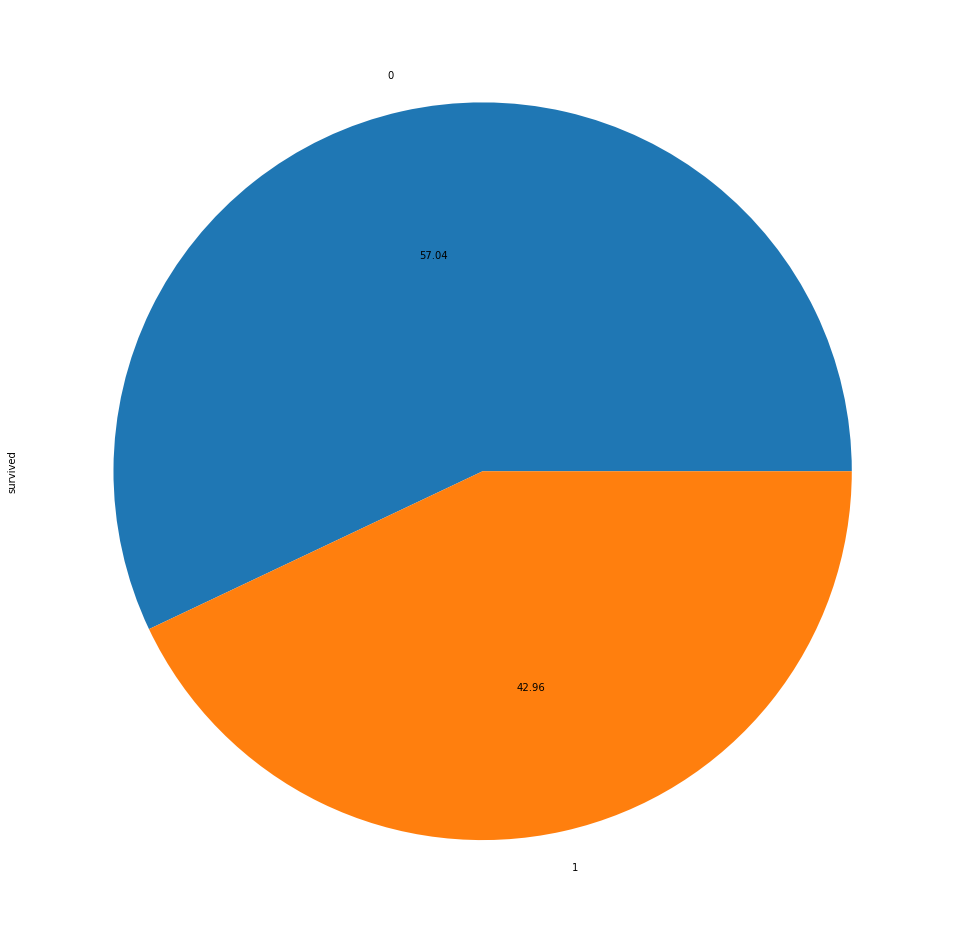

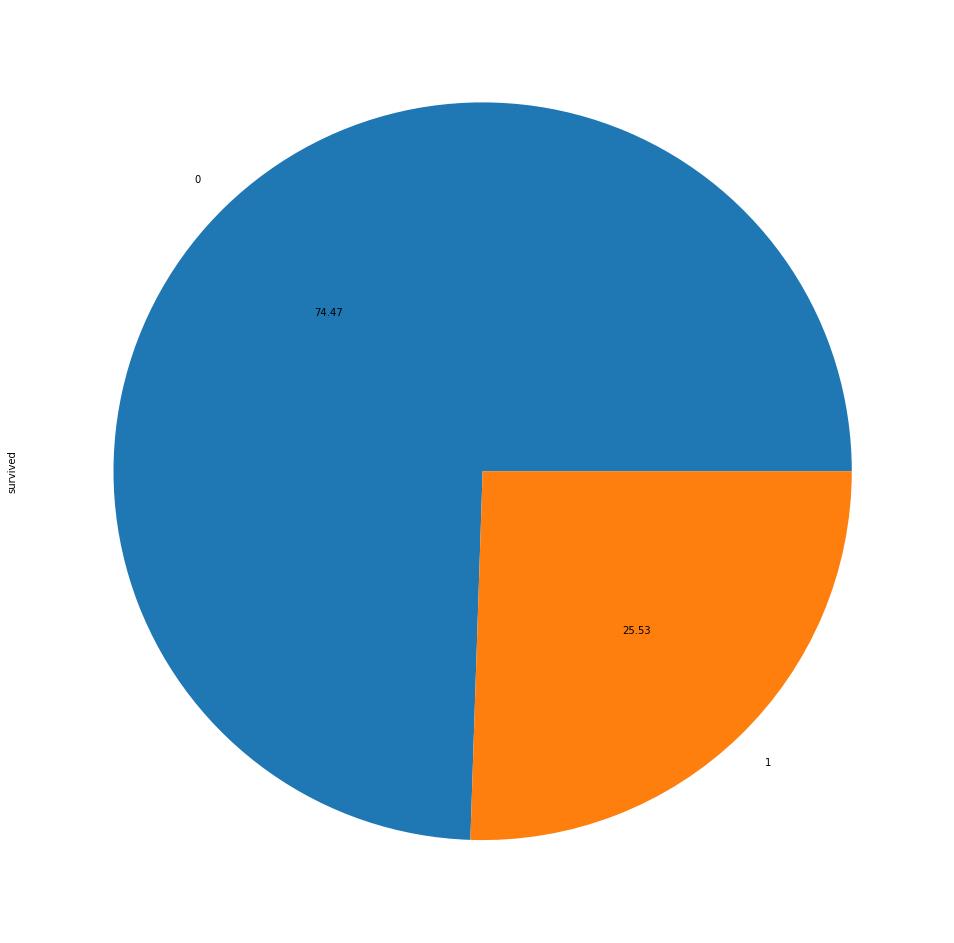

In [16]:
#Task 4:For each travel class, calculate the proportion of the passengers that survived. 
#Present your results in pie charts.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

titanic = pd.read_excel("Data/titanic.xls")
# Creat a dataframe with only the person who traveled in 1st class.
class1 = titanic.loc[titanic['pclass'] == 1]
#Count how many times survived and not survived appear in this list and the plot it in a pie chart. 
class1['survived'].value_counts().plot.pie(autopct='%0.2f', fontsize=10, figsize=(15, 15))
plt.show()
plt.axis('equal')
plt.tight_layout()

# Creat a dataframe with only the person who traveled in 2nd class.
class2 = titanic.loc[titanic['pclass'] == 2]

#Count how many times survived and not survived appear in this list and the plot it in a pie chart. 
class2['survived'].value_counts().plot.pie(autopct='%0.2f', fontsize=10, figsize=(15, 15))
plt.show()
plt.axis('equal')
plt.tight_layout()

# Creat a dataframe with only the person who traveled in 3rd class.
class3 = titanic.loc[titanic['pclass'] == 3]

#Count how many times survived and not survived appear in this list and the plot it in a pie chart. 
class3['survived'].value_counts().plot.pie(autopct='%0.2f', fontsize=10, figsize=(15, 15))
plt.show()
plt.axis('equal')
plt.tight_layout()

In task 5 we compare have many survived in each category where we categories by travel class and sex.

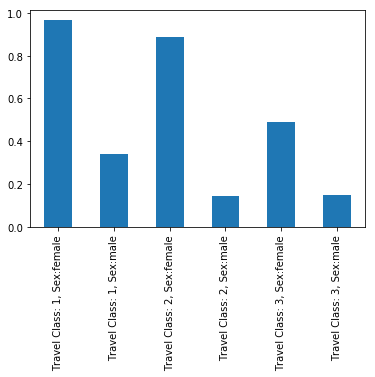

In [18]:
#Task5
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

titanic = pd.read_excel("Data/titanic.xls")

titanic = titanic.replace(np.nan, 'Unknown', regex=True)

#Include only the persons who survived in a dataframe called survived
survived = titanic.loc[titanic['survived'] == 1]

#Include only the persons who died in a dataframe called not_survived
not_survived =  titanic.loc[titanic['survived'] == 0]

#Creat a new series consisting of index for class and sex for the survived dataframe
class_sex_survived = 'Travel Class: '+ survived.pclass.astype(str) + ', Sex:'+ survived.sex

#Creat a new series consisting of index for class and sex for the not_survived dataframe
class_sex_not_survived = 'Travel Class: '+ not_survived.pclass.astype(str) + ', Sex:' + not_survived.sex

#Count the diffrent attributes in the coulmn and save it in a new series
count_class_sex_not_survived = class_sex_not_survived.value_counts()
count_class_sex_survived = class_sex_survived.value_counts()

#Sort the data and then calculate the porportions of survived for each category
count_class_sex_not_survived.sort_index()
count_class_sex_survived.sort_index()
porportion_class_sex = count_class_sex_survived.divide(count_class_sex_not_survived + count_class_sex_survived)

#plot the results in a bar plot
porportion_class_sex.plot.bar()
plt.show()

In task 6 we creat two equally populated age categories by using qcut and the we calculate survival proportions by age category, travel class and sex. We assume that survival proportion means that we compare the number of survived in each category to the total number of survived. If the age of a passenger is not stated we exclude this passenger since we can not include this person in the age category without changing the data. We make a unique index where it is easy to understund which category each number represent.

In [19]:
#Task6: Create 2 equally populated age categories and calculate survival proportions by age category, 
#travel class and sex. Present your results in a DataFrame with unique index.
import pandas as pd
import numpy as np


#Load titanic xls file into a data frame
titanic = pd.read_excel("Data/titanic.xls")

survived = titanic.loc[titanic['survived'] == 1]

not_survived =  titanic.loc[titanic['survived'] == 0]

#Take away all null values since we are not intrestead in the cases that the age is not given.
survived = survived[survived.age.notnull()]
#We use qcut to creat a interval with equally populated age categories. We get [0.166 28) and [28 80) as the result.
survived['age_categories'] = pd.qcut(survived.age, 2)

# Add the age categories, class and sex of each persons to make a unique index and save it in a series.
class_sex_survived = ' age category:' + survived.age_categories.astype(str) + ', class:' + survived.pclass.astype(str) + ', sex:' + survived.sex
#Calculate how often each element in class_sex_survived appear and save it.
#Take away all null values

#We count how many times each index appear
value_class_sex_survived = class_sex_survived.value_counts()

# Divide the count of each index with the total indices to get the survival proportions and then make it a dataframe.
value_class_sex_survived = value_class_sex_survived.divide(value_class_sex_survived.sum()).to_frame()

# Rename 2nd column to porportions
value_class_sex_survived.rename(columns={0:'Proportions'}, inplace=True)

#Check if indices is unique, returns true.
value_class_sex_survived.index.is_unique

#print the dataframe
value_class_sex_survived

,Proportions
"age category:(28.0, 80.0], class:1, sex:female",0.208431
"age category:(0.166, 28.0], class:3, sex:female",0.131148
"age category:(0.166, 28.0], class:2, sex:female",0.119438
"age category:(0.166, 28.0], class:3, sex:male",0.096019
"age category:(28.0, 80.0], class:2, sex:female",0.096019
"age category:(0.166, 28.0], class:1, sex:female",0.091335
"age category:(28.0, 80.0], class:1, sex:male",0.084309
"age category:(28.0, 80.0], class:3, sex:male",0.042155
"age category:(0.166, 28.0], class:1, sex:male",0.039813
"age category:(0.166, 28.0], class:2, sex:male",0.037471


For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

In [ ]:
# Write your answer here